# **Machine Learning Model for predicting Mental Health Issues**

**Mayank Pujara** 

## **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go  
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler,StandardScaler

C:\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **Loading the dataset**

In [2]:
data = pd.read_csv(r'Mental Health Tech Survey Dataset.csv')
data.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
data.shape

(1259, 27)

## **Data Preprocessing**

In [5]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

**We have missing values in the following columns state, self_employed, work_interfere and comments.**

In [6]:
data['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [7]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [8]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [9]:
data['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [10]:
# Deletion of the state and comments fields.
data.drop(['state','comments', 'Timestamp'], axis=1, inplace = True)

# Replacing the self_employed and work_interfere field with their respecitve Mode 
data['self_employed'] = data['self_employed'].replace(np.nan, data['self_employed'].mode()[0])
data['work_interfere'] = data['work_interfere'].replace(np.nan, data['work_interfere'].mode()[0])

In [11]:
# Verifying the elimination of the missing values
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [12]:
# Checking for any duplicated values
data.duplicated().any()

True

In [13]:
#Unique values in the Gender field

print('Unique Genders present in the data :', data['Gender'].nunique())
print('Unique Genders present in the data :', set(data['Gender']))

Unique Genders present in the data : 49
Unique Genders present in the data : {'M', 'A little about you', 'Femake', 'Guy (-ish) ^_^', 'female', 'Male-ish', 'fluid', 'Female', 'woman', 'male', 'Mail', 'something kinda male?', 'Male (CIS)', 'non-binary', 'Agender', 'All', 'cis-female/femme', 'Man', 'Trans-female', 'maile', 'Make', 'Female (trans)', 'Malr', 'Male ', 'femail', 'cis male', 'Female (cis)', 'Androgyne', 'Trans woman', 'm', 'Female ', 'msle', 'Enby', 'queer', 'p', 'f', 'Neuter', 'Cis Male', 'Cis Female', 'queer/she/they', 'Genderqueer', 'Cis Man', 'F', 'Male', 'ostensibly male, unsure what that really means', 'Mal', 'Nah', 'Woman', 'male leaning androgynous'}


In [14]:
data['Gender'].str.lower().unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [15]:
uniqueGender = data['Gender'].str.lower().unique()
maleCategories = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
transCategories = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"] 
femaleCategories = ["cis female", "f", "female", "woman",  "femake", "female ", "cis-female/femme", "female (cis)", "femail"]

for (row,column) in data.iterrows():
    if str.lower(column['Gender']) in maleCategories:
        data['Gender'].replace(to_replace = column['Gender'], value = 'male', inplace = True)
    if str.lower(column['Gender']) in femaleCategories:
        data['Gender'].replace(to_replace = column['Gender'], value = 'female', inplace = True)
    if str.lower(column['Gender']) in transCategories:
        data['Gender'].replace(to_replace = column['Gender'], value = 'trans', inplace = True)

# Remove unnecessary text
rmText = ['A little about you', 'p']
data = data[~data['Gender'].isin(rmText)]
print(data['Gender'].unique())

['female' 'male' 'trans']


## **Data Visualization**

In [16]:
data['Age'].median()

31.0

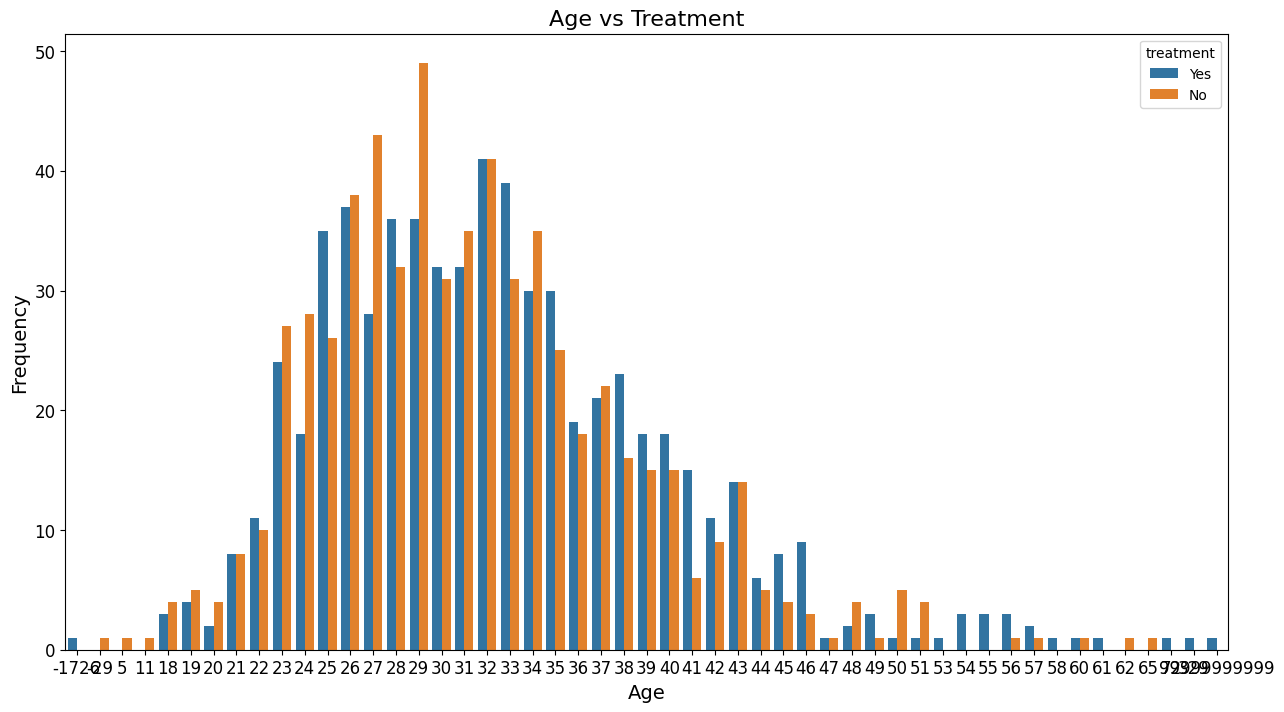

In [17]:
fig = plt.figure(figsize=(15, 8))

sns.countplot(x='Age', hue='treatment', data=data)

plt.title(label='Age vs Treatment', size=16)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Frequency', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Individuals over the ***age of 30*** are addressing their mental health concerns.

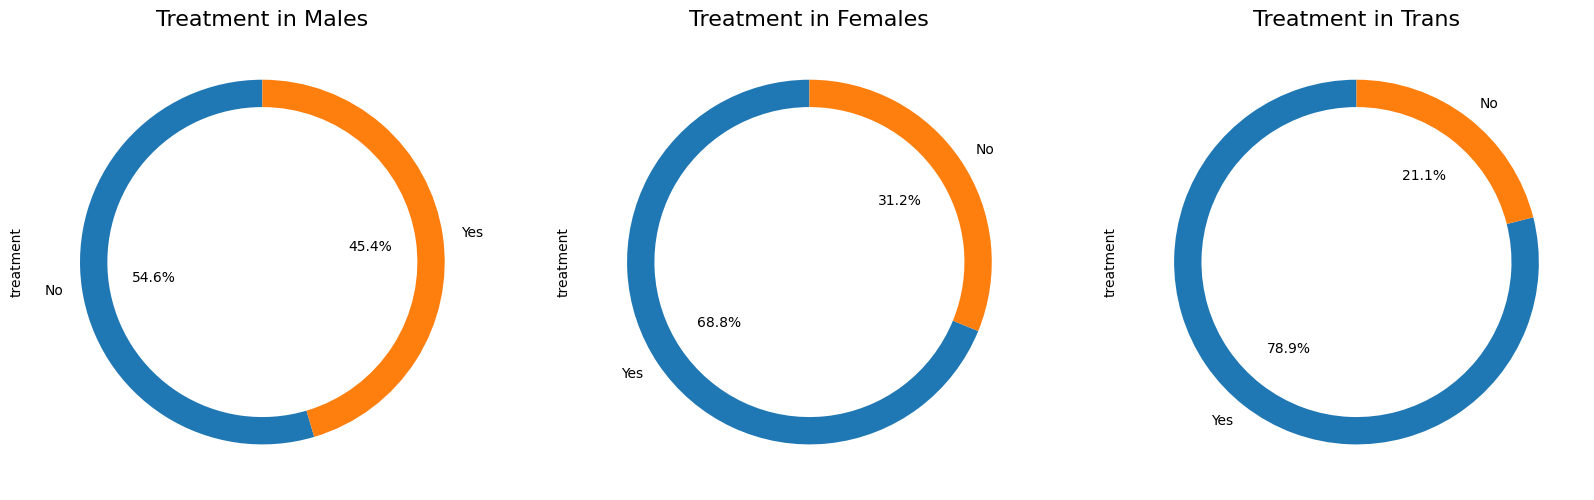

In [18]:
figure = plt.figure(figsize=[20, 10])

plt.subplot(1,3,1)
data['treatment'][data['Gender'] == 'male'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Males', size=16)

plt.subplot(1,3,2)
data['treatment'][data['Gender'] == 'female'].value_counts().plot.pie(autopct='%1.1f%%',wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Females', size=16)

plt.subplot(1,3,3)
data['treatment'][data['Gender'] == 'trans'].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = dict(width = 0.15), startangle=90)
plt.title(label='Treatment in Trans', size=16)

plt.show()

Individuals identifying as ***Trans and Females*** exhibit a higher tendency to seek treatment for mental health issues in comparison to ***Males.***


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1257 non-null   int64 
 1   Gender                     1257 non-null   object
 2   Country                    1257 non-null   object
 3   self_employed              1257 non-null   object
 4   family_history             1257 non-null   object
 5   treatment                  1257 non-null   object
 6   work_interfere             1257 non-null   object
 7   no_employees               1257 non-null   object
 8   remote_work                1257 non-null   object
 9   tech_company               1257 non-null   object
 10  benefits                   1257 non-null   object
 11  care_options               1257 non-null   object
 12  wellness_program           1257 non-null   object
 13  seek_help                  1257 non-null   object
 14  anonymit

### **Using LabelEncoder to change the Data types to 'int' for training the model**

In [20]:
from sklearn.preprocessing import LabelEncoder

labelEnc = LabelEncoder()

columnsToEncode = ['Gender','Country','care_options','seek_help','wellness_program','self_employed','family_history', 'treatment','work_interfere','no_employees','remote_work', 'tech_company','benefits','anonymity','leave', 'mental_health_consequence','phys_health_consequence','coworkers','phys_health_interview','mental_vs_physical','obs_consequence','mental_vs_physical','supervisor','mental_health_interview']

for columns in columnsToEncode:
    data[columns] = labelEnc.fit_transform(data[columns])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1257 non-null   int64
 1   Gender                     1257 non-null   int32
 2   Country                    1257 non-null   int32
 3   self_employed              1257 non-null   int32
 4   family_history             1257 non-null   int32
 5   treatment                  1257 non-null   int32
 6   work_interfere             1257 non-null   int32
 7   no_employees               1257 non-null   int32
 8   remote_work                1257 non-null   int32
 9   tech_company               1257 non-null   int32
 10  benefits                   1257 non-null   int32
 11  care_options               1257 non-null   int32
 12  wellness_program           1257 non-null   int32
 13  seek_help                  1257 non-null   int32
 14  anonymity               

In [21]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

data['Age'] = MaxAbsScaler().fit_transform(data[['Age']])
data['Country'] = StandardScaler().fit_transform(data[['Country']])
data['work_interfere'] = StandardScaler().fit_transform(data[['work_interfere']])
data['no_employees'] = StandardScaler().fit_transform(data[['no_employees']])
data['leave'] = StandardScaler().fit_transform(data[['leave']])

data.describe()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.257000e+03,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1.257000e+03,1.257000e+03,1257.000000,1257.000000,...,1257.000000,1.257000e+03,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,7.955453e-04,0.818616,-1.611016e-16,0.114558,0.389817,0.505171,-7.913762e-17,-1.215328e-16,0.297534,0.818616,...,0.645187,5.935321e-17,0.851233,0.829753,0.970565,1.096261,0.868735,0.715990,0.813047,0.144789
std,2.820541e-02,0.422915,1.000398e+00,0.318615,0.487903,0.500172,1.000398e+00,1.000398e+00,0.457355,0.385490,...,0.907222,1.000398e+00,0.767150,0.485102,0.619425,0.844310,0.425446,0.722483,0.833736,0.352028
min,-1.726000e-08,0.000000,-2.783729e+00,0.000000,0.000000,0.000000,-1.828639e+00,-1.604469e+00,0.000000,0.000000,...,0.000000,-9.342177e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.700000e-10,1.000000,3.148011e-01,0.000000,0.000000,0.000000,-9.693498e-01,-1.028893e+00,0.000000,1.000000,...,0.000000,-9.342177e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.100000e-10,1.000000,5.415228e-01,0.000000,0.000000,1.000000,7.492294e-01,1.222584e-01,0.000000,1.000000,...,0.000000,-2.700143e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.600000e-10,1.000000,5.415228e-01,0.000000,1.000000,1.000000,7.492294e-01,6.978342e-01,1.000000,1.000000,...,2.000000,3.941891e-01,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,1.000000e+00,2.000000,6.926706e-01,1.000000,1.000000,1.000000,7.492294e-01,1.273410e+00,1.000000,1.000000,...,2.000000,1.722596e+00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

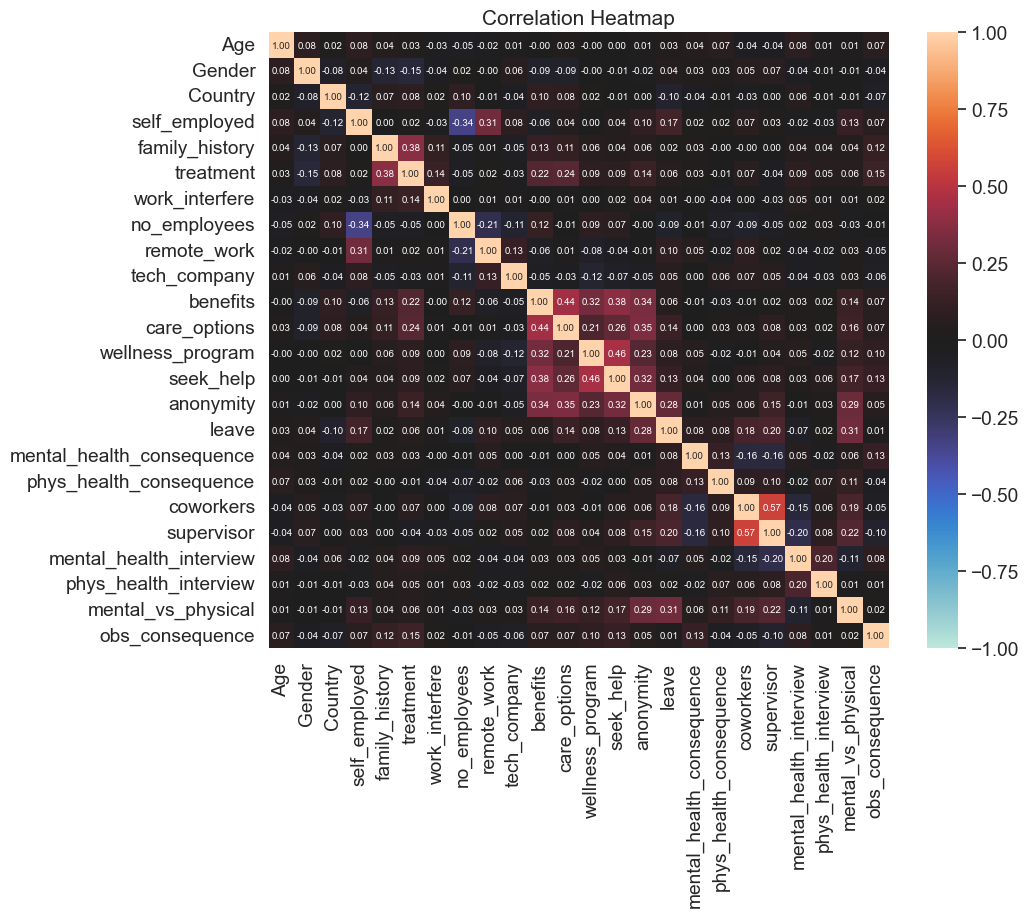

In [22]:
# Correlation Heatmap
matrix= data.corr().round(2)
plt.figure(figsize=(10,8))
sns.set(font_scale=1.25)
plot = sns.heatmap(matrix,annot = True,vmin= -1 , vmax= 1 , center= 0,fmt='.2f', annot_kws={'size': 7})
plt.title('Correlation Heatmap')

## **Model Training**

In [23]:
# Modules required for training the model
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

**For prediction purpose, making use of the *treatment* column**

In [24]:
X = data.drop(columns= ['treatment'])
X.shape

(1257, 23)

In [25]:
y= data['treatment']
y.shape

(1257,)

## **Splitting the data into training and testing sets**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **Model Implementation using *K Nearest Neigbour Classifier***

In [27]:
classifier = KNN(n_neighbors= 8)
classifier.fit(X_train,y_train)
y_= classifier.predict(X_test.values)
print('Accuracy of the KNN Model is:', accuracy_score(y_true=y_test, y_pred=y_)*100)

Accuracy of the KNN Model is: 66.4021164021164


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## **Model Implementation using *Random Forest Classifier***

In [28]:
steps_rfc = [('Scaler', StandardScaler()),('clf', RFC(n_estimators = 100))]
clf_rfc = Pipeline(steps=steps_rfc)
clf_rfc.fit(X_train, y_train)
y_pred_rfc = clf_rfc.predict(X_test)
print('Accuracy of the Random Forest Classifier is:', accuracy_score(y_true=y_test, y_pred=y_pred_rfc)*100)

Accuracy of the Random Forest Classifier is: 75.39682539682539


## **Model Implementation using *Support Vector Classification Model***

In [29]:
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]
clf_svc = Pipeline(steps = steps_svc)
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
print('Accuracy of the Support Vector Classifier is:', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

Accuracy of the Support Vector Classifier is: 73.80952380952381


## **Model Implementation using *Decision Tree Classifier***

In [30]:
classifier = DT()
classifier.fit(X_train,y_train)
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the Decision Tree Classifier is:', accuracy*100)

Accuracy of the Decision Tree Classifier is: 68.51851851851852
